# Сэмплирование апостериорной функции
# методом Метрополиса-Хастингса

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm, shapiro, kstest, anderson
from sklearn.mixture import GaussianMixture

In [52]:
T = 30
B_real = np.random.uniform(size=6)

# сгенерированные значения x
X = np.random.uniform(low=-1.5, high=1.5, size=30)

# матрица X в степенях
X_pow = np.array([[x ** i for i in range(6)] for x in X])

 # предподсчитанные Y с нормальной ошибкой
Y = X_pow @ B_real.T + np.random.normal(0, 0.1)

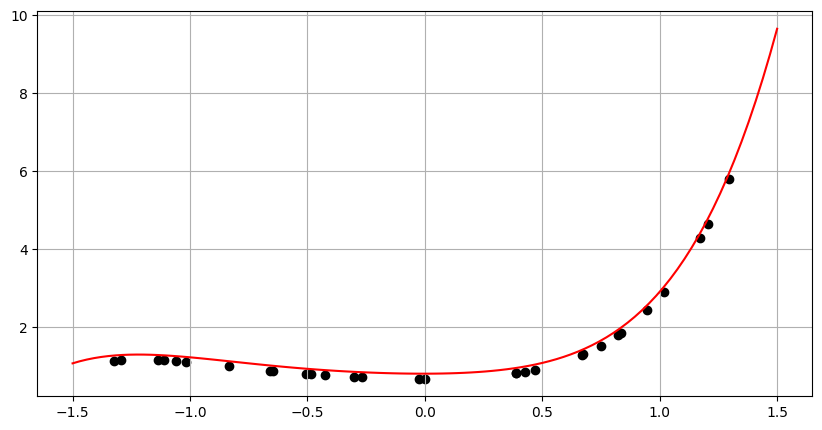

In [53]:
curve_x = np.linspace(-1.5, 1.5, 100)
curve_y = np.polyval(B_real[::-1], curve_x)
plt.figure(figsize=(10, 5))
plt.plot(curve_x, curve_y, color='red')
plt.scatter(X, Y, color='black')
plt.grid(True)
plt.show()

In [55]:
#  индикаторная функция
def pdf(B, sigma):
	sigma_pow = np.power(1 / sigma, T + 1)
	ident = (sigma > 0) and (sigma < np.inf)
	sigma_sq = -1 / 2 * sigma ** 2
	matr = np.square(Y - X_pow @ B.T).mean()
	# print(f"{sigma_pow=} {ident=} {sigma_sq=} {matr=}")
	return sigma_pow * np.exp(sigma_sq * matr) * ident

In [56]:
def proprnd(y, sigma):
  y = np.random.multivariate_normal(y, np.diag(VarEmpirical[:6]))
  sigma = abs(np.random.normal(sigma, VarEmpirical[6] ** 2))
  return y, sigma

In [62]:
nsamples = 30000
samples = np.zeros((nsamples, 7))
VarEmpirical = np.array([0.439828,  0.89128817,  0.9993982 , -0.99183786,  0.98447824,
       -1.31974212, -3.08468906e-2])

In [69]:
def MH():
  current_sample, noise = np.copy(B_real), 1.01
  accept_count = 0
  for i in range(nsamples):
      next_sample, next_noise = proprnd(current_sample, noise)
      cur =  pdf(current_sample, noise)S
      next = pdf(next_sample, next_noise)
      prob_transition = min(1, next / cur)
      if np.random.uniform(0, 1) < prob_transition:
          accept_count += 1
          current_sample, noise = next_sample, next_noise

      samples[i, :] = *current_sample, noise
  return accept_count

In [73]:
accept_rate = 0
while accept_rate < 0.15:
    accept_rate = MH() / nsamples
    VarEmpirical = [abs(v + np.random.normal(0, 0.00001)) if i < 7 else  abs(v + np.random.normal(0, 0.000001)) for i, v in enumerate(VarEmpirical)]
    print(accept_rate)

0.2900333333333333


In [75]:
accept_rate

0.2900333333333333

## Гистограммы распределения параметров модели

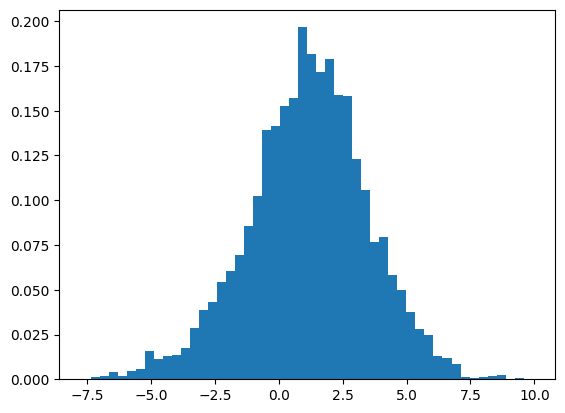

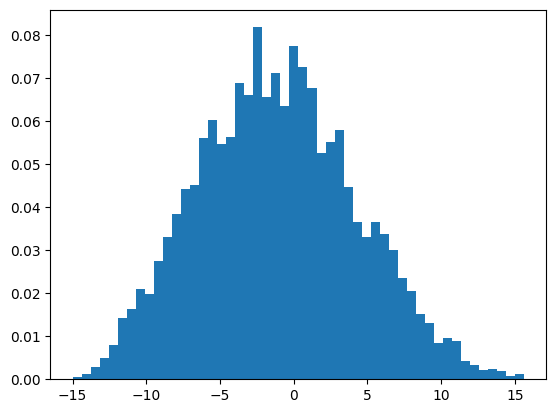

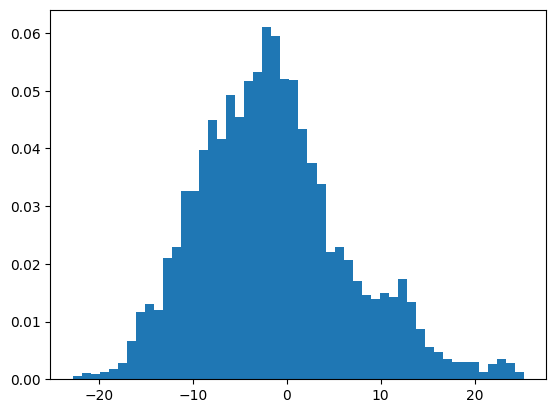

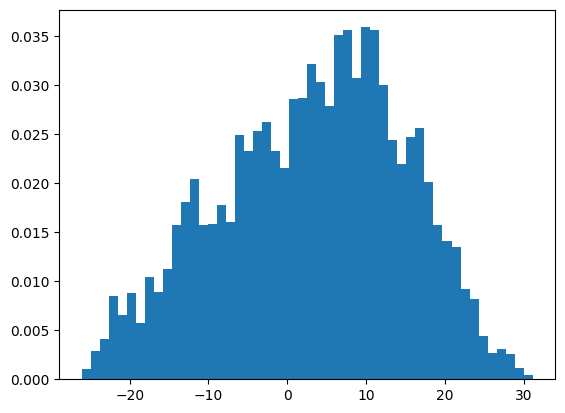

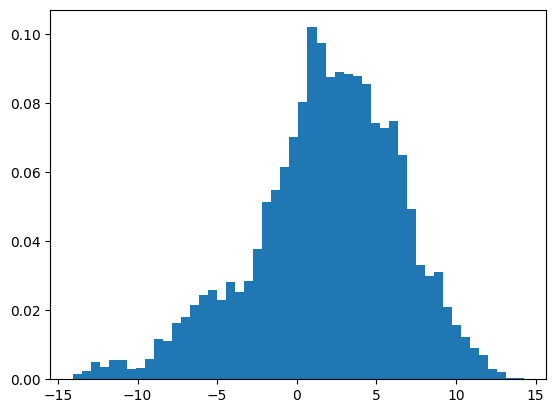

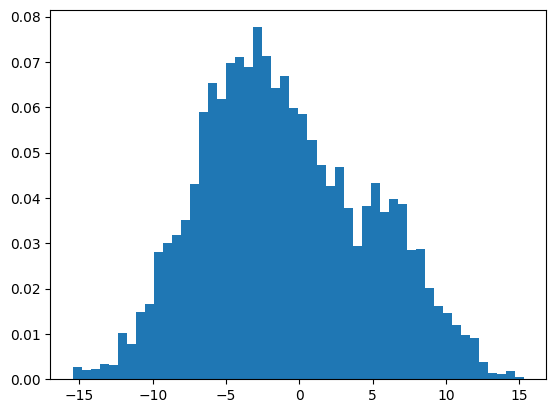

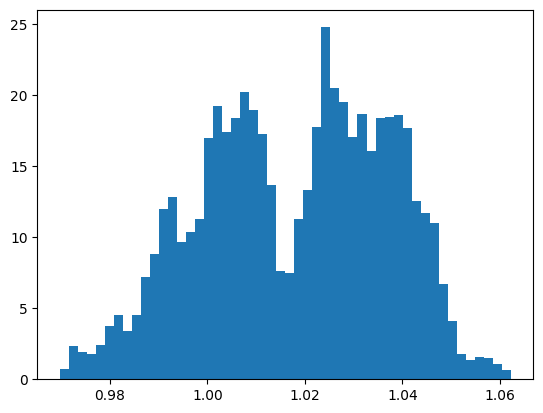

In [77]:
for i in range(7):
  plt.hist(samples[:, i], density=True, bins=50)
  plt.show()

# Сэмпилрование смеси нормальных распределений

### Параметры распределений и генерация значений

In [202]:
mean1, disp1 = -1, 0.9
mean2, disp2 = 2, 0.7
w1, w2 = 0.7, 0.3
distrib_size = 10000
distrib1 = np.random.normal(mean1, disp1, int(distrib_size * w1) )
distrib2 = np.random.normal(mean2, disp2, int(distrib_size * w2))

mixture = np.concatenate((distrib1, distrib2))

### Проверка нормальности компонент смеси распределения

In [203]:
print(f"Критерий Шапиро для distrib1 {shapiro(distrib1)}")
print(f"Критерий Шапиро для distrib2 {shapiro(distrib2)}")
res1, res2 =anderson(distrib1), anderson(distrib2)
print(f"Критерий Андерсона-Дарлинга для distrib1 {res1.statistic, res1.fit_result.message}")
print(f"Критерий Андерсона-Дарлинга для distrib2 {res2.statistic, res2.fit_result.message}")

Критерий Шапиро для distrib1 ShapiroResult(statistic=0.9997847676277161, pvalue=0.7389537692070007)
Критерий Шапиро для distrib2 ShapiroResult(statistic=0.9990102052688599, pvalue=0.086507149040699)
Критерий Андерсона-Дарлинга для distrib1 (0.3397982143824265, '`anderson` successfully fit the distribution to the data.')
Критерий Андерсона-Дарлинга для distrib2 (0.855754249995698, '`anderson` successfully fit the distribution to the data.')


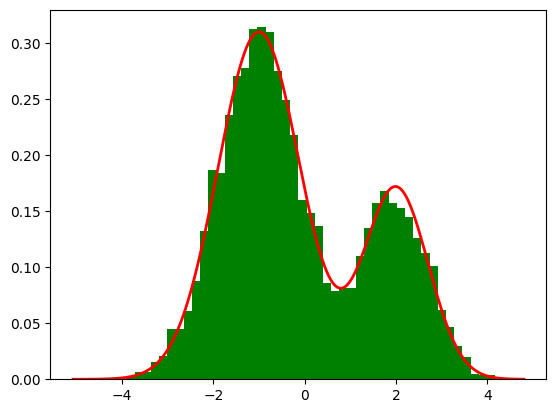

In [204]:
# Построение гистограммы плотностей смеси
plt.hist(mixture, bins=50, density=True,color='green')

# Построение кривой смеси
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = w1 * norm.pdf(x, mean1, disp1) + w2 * norm.pdf(x, mean2, disp2)
plt.plot(x, p, linewidth=2, color='red')
plt.show()

## Разделение смеси с использованием EM-алгоритма

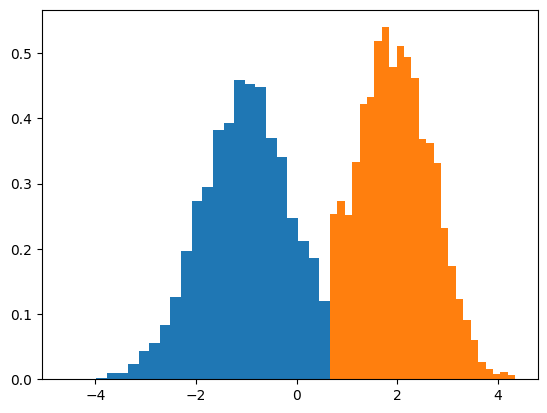

Means: [[-1.05127947]
 [ 1.92233603]]
Covariances: [[[0.7518048]]

 [[0.6090626]]]


In [210]:
# подготовка данных
reshaped_mixture = mixture.reshape(-1, 1)

# EM-алгоритм для разделения смеси
gmm = GaussianMixture(n_components=2)
gmm.fit(reshaped_mixture)

# Визуализация разделенной смеси данных с использованием гистограммы
for component in range(gmm.n_components):
    plt.hist(mixture[gmm.predict(reshaped_mixture) == component], bins=25, density=True)
plt.show()
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)